Importar librerias necesarias:

In [1]:
import fastai.basics as fai
import pandas as pd
import numpy as np
from pathlib import Path

import warnings
warnings.simplefilter("ignore")

# Modelo Básico para Análisis de Sentimiento de Amazon Reviews

En el presente proyecto se busca mostrar el desempeño de un modelo básico para el análisis de sentimientos. Desarrollado en el lenguaje de programación Python con ayuda del kit de herramientas del lenguaje natural o NLTK, sobre un subconjunto del dataset Amazon Reviews disponible en la API de fastai, librería orientada a Deep Learning.

## Introducción

El _análisis de sentimiento_ es la herramienta de clasificación de texto más común que analiza un corpus y nos dice si el sentimiento de ese corpus es positivo, negativo o neutral. Analizar conversaciones de redes sociales, reseñas de productos, artículos de noticias o investigación puede ser útil para darnos una idea de la percepción general de la población hacia cierta marca, aplicación, temática, etc.

Con el API de la librería fastai podemos descargar los datos:

In [2]:
amazon = fai.untar_data(fai.URLs.AMAZON_REVIEWS)

In [3]:
!ls {amazon}

readme.txt  test.csv  train.csv


## Descripción de los datos

In [4]:
!cat {amazon/"readme.txt"}

Amazon Review Full Score Dataset

Version 3, Updated 09/09/2015

ORIGIN

The Amazon reviews dataset consists of reviews from amazon. The data span a period of 18 years, including ~35 million reviews up to March 2013. Reviews include product and user information, ratings, and a plaintext review. For more information, please refer to the following paper: J. McAuley and J. Leskovec. Hidden factors and hidden topics: understanding rating dimensions with review text. RecSys, 2013.

The Amazon reviews full score dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the above dataset. It is used as a text classification benchmark in the following paper: Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advances in Neural Information Processing Systems 28 (NIPS 2015).


DESCRIPTION

The Amazon reviews full score dataset is constructed by randomly taking 600,000 training samples and 130,000 testing samples for each review score from 

El conjunto de datos de reseñas de Amazon consta de reseñas de amazon. Los datos abarcan un período de 18 años, incluidas aproximadamente 35 millones de reseñas hasta marzo de 2013. Las reseñas incluyen información sobre productos y usuarios, calificaciones y una reseña en texto sin formato. Para más información del conjunto de datos visitar el siguinete enlace: https://s3.amazonaws.com/amazon-reviews-pds/readme.html

In [5]:
df = pd.read_csv(amazon/"train.csv", names=['class index','title','text'])
df

,class index,title,text
0,3,more like funchuck,"Gave this to my dad for a gag gift after directing ""Nunsense,"" he got a reall kick out of it!"
1,5,Inspiring,"I hope a lot of people hear this cd. We need more strong and positive vibes like this. Great vocals, fresh tunes, cross-cultural happiness. Her blues is from the gut. The pop sounds are catchy and mature."
2,5,The best soundtrack ever to anything.,"I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."
3,4,Chrono Cross OST,"The music of Yasunori Misuda is without question my close second below the great Nobuo Uematsu.Chrono Cross OST is a wonderful creation filled with rich orchestra and synthesized sounds. While ambiance is one of the music's major factors, yet at times it's very uplifting and vigorous. Some of my favourite tracks include; ""Scars Left by Time, The Girl who Stole the Stars, and Another World""."
4,5,Too good to be true,Probably the greatest soundtrack in history! Usually it's better to have played the game first but this is so enjoyable anyway! I worked so hard getting this soundtrack and after spending [money] to get it it was really worth every penny!! Get this OST! it's amazing! The first few tracks will have you dancing around with delight (especially Scars Left by Time)!! BUY IT NOW!!
5,5,There's a reason for the price,"There's a reason this CD is so expensive, even the version that's not an import.Some of the best music ever. I could listen to every track every minute of every day. That's about all i can say."
6,1,Buyer beware,"This is a self-published book, and if you want to know why--read a few paragraphs! Those 5 star reviews must have been written by Ms. Haddon's family and friends--or perhaps, by herself! I can't imagine anyone reading the whole thing--I spent an evening with the book and a friend and we were in hysterics reading bits and pieces of it to one another. It is most definitely bad enough to be entered into some kind of a ""worst book"" contest. I can't believe Amazon even sells this kind of thing. Maybe I can offer them my 8th grade term paper on ""To Kill a Mockingbird""--a book I am quite sure Ms...."
7,4,"Errors, but great story","I was a dissapointed to see errors on the back cover, but since I paid for the book I read it anyway. I have to say I love it. I couldn't put it down. I read the whole book in two hours. I say buy it. I say read it. It is sad, but it gives an interesting point of view on church today. We spend too much time looking at the faults of others. I also enjoyed beloved.Sincerly,Jaylynn R"
8,1,The Worst!,"A complete waste of time. Typographical errors, poor grammar, and a totally pathetic plot add up to absolutely nothing. I'm embarrassed for this author and very disappointed I actually paid for this book."
9,1,Oh please,"I guess you have to be a romance novel lover for this one, and not a very discerning one. All others beware! It is absolute drivel. I figured I was in trouble when a typo is prominently featured on the back cover, but the first page of the book removed all doubt. Wait - maybe I'm missing the point. A quick re-read of the beginning now makes it clear. This has to be an intentional churning of over-heated prose for satiric purposes. Phew, so glad I didn't waste $10.95 after all."


## 3 millones de registros!

Usando la instrucción _pandas.DataFrame.sample_ podemos obtener una muestra de nuestros datos.
Para fines practicos nos quedaremos con una muestra de 3000 registros:

In [6]:
#df_sample = df.sample(frac=0.001, replace=True, random_state=42)
#df_sample.reset_index(inplace=True, drop=True)
#df_sample.to_csv('amazon_sample_3000.csv',index=False)

## Confirmación de lectura de nuestro nuevo conjunto de datos

In [7]:
amazon_sample_3000 = pd.read_csv('amazon_sample_3000.csv')

In [8]:
amazon_sample_3000.head(10)

,class index,title,text
0,2,Promises to Keep,I was disappointed in the condition of this book. It has mildew on the pages and has been wet at some point.
1,3,limp software,"Conveniences:Exporting maps to PDA.It's there when the internet goes down.Inconveniences:Major roads are often only listed at SR-23423 or some other technical name. While this might be cartologically indisputable, the rest of the world, including businesses, street signs, and locals use something called ""street names"", like ""Lawrenceville Hwy"" or ""Apple Avenue"" or whatever. This renders the program unusable in certain circumstances. Thus, I find myself constantly using yahoo and google to find addresses in Atlanta.I don't know if the 2007 ver has updated anything about New York City, but e..."
2,5,Love it,"For the price, its unbelievable. I usually have it on low so its not too noisy, but high isn't that noisy either. Kinda wish it had a medium setting but all in all VERY satisfied."
3,1,Walk the halls?,"I was very disappointed when I read this book. I was hoping to read cutting-edge research on leadership supported by personal experiences. However, what I got was a book full of personal anecdotes. Do I really need to pay someone $25 to tell me to build a rapport with my teachers and students? Walk the halls? Isn't that just common sense? Waste of time and money"
4,3,beware,"This album is OK if you like jazzy, 60's, very perky lounge group-vocals like Lambert, Hendricks and Ross and the groups one used to hear on 60's TV variety shows, but it is very definately not like the Salvador of ""Chambre avec Vue."""
5,5,"Lock, stock, and great","""Lock, Stock, and Two Smoking Barrels"" is a British crime-fiction film and is a breakout offering by Director Guy Ritchie.The narrative is cleverly constructed and whilst groups of protagonists at first appear to standalone their interaction creates a fantastic series of events.The film contains a terrific cast and many of whom have become very well known since this work such as: Jason Flemyng (as Tom), Dexter Fletcher (plays Soap), Nick Moran (is Eddy), and Jason Statham (plays Bacon).It is quite a treat for viewers as the diversity of the story with its many turns and twists is absorbing..."
6,5,The King and the Corpse,"I usually don't read mythology books straight through, rather use them as reference. As such this book is easy to use. With Joseph Campbell as the editor I feel assured that it is a good rendition of the myths. I found it relevant to specific images I wanted to learn about. Excellent addition to my ""images"" library."
7,2,blitz jewelry cleaner,"the cleaner works fine but the jar it comes in is not well made and it is difficult to open and close. It makes a mess every time I use it. The last jar I had was made from better material, but this is just junk!!! I will not purchase this item again."
8,1,???,The book was great but the movie was quite disappointing. Really glad I read the book first. Maybe I just expected too much. Really tired of good books being made into poor movies. Another example is Eragon. Highly recommend the book but not the movie.
9,2,I was suprised that the songs from key moments were gone.,"I really was suprised that my favorite songs from the key moments of the show were missing. Like ""Kiss the rain"" by Billie Myers when Dawson and Joey make up, and ""Say goodnight"" by Beth Neilsen Chapman at the end of season 1 when Dawson and Joey kiss. Overall I had not heard of 80% of the songs on the cd. Even though I am a hardcore show fanatic, I opted not to buy the so-called ""soundtrack"" Scott Engle, 14 Belleville, KS"


# Un modelo básico de análisis de sentimientos

Procedimientos:
1. Tokenizar y etiquetar las palabras en el review. 
2. Filtrar la información de manera que nos quedemos sólo con los adjetivos
3. Usar VADER para establecer la valencia de cada adjetivo.
4. Sumar la valencia de adjetivos en el review y con eso decidir si el review es positivo o negativo.

## 1 Tokenizar y etiquetar (Taggear) palabras de los reviews

Esta opción me deja usar expresiones regulares! dado un texto, este tokenizador me va a devolver tokens SIN signos de puntuación, sólo palabras.

In [9]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizador = RegexpTokenizer(r'\w+') 
#nltk.download('averaged_perceptron_tagger')

El etiquetado gramatical o POS (de part-of-speech tagging) es un método para etiquetar las palabras en un texto basándonos en su definición y en su contexto. Cada palabra es identificada de acuerdo a su categoría gramatical, de manera que podemos distinguir entre sustantivos, adjetivos, verbos.<br>

Cada software diseñado para esta tarea tiene su propio etiquetado y es importante revisar la documentación de la biblioteca en turno al momento de empezar un proyecto. Por ejemplo, la biblioteca NLTK de Python considera las siguientes categorías:

<img src="nltk-speech-codes.png" width="850" height="800" />

El etiquetado POS se hace sobre palabras, así que tenemos que tokenizar ahora cada review y asignarle etiquetas.

In [10]:
def TokenTag(texto):
    """
    Parameters
    ----------
    texto : str
        cadena de texto a tokenizar y taggear
    """
    tokens = nltk.sent_tokenize(texto)
    aux = []
    for i in range(len(tokens)):
        datosPOS = nltk.pos_tag(tokenizador.tokenize(tokens[i]))
        for j in datosPOS:
            aux.append(j)
    return aux

In [11]:
amazon_sample_3000['text TokenTag'] = amazon_sample_3000['text'].apply (lambda row: TokenTag(row))

In [12]:
amazon_sample_3000.head(5)

,class index,title,text,text TokenTag
0,2,Promises to Keep,I was disappointed in the condition of this book. It has mildew on the pages and has been wet at some point.,"[(I, PRP), (was, VBD), (disappointed, VBN), (in, IN), (the, DT), (condition, NN), (of, IN), (this, DT), (book, NN), (It, PRP), (has, VBZ), (mildew, VBN), (on, IN), (the, DT), (pages, NNS), (and, CC), (has, VBZ), (been, VBN), (wet, VBN), (at, IN), (some, DT), (point, NN)]"
1,3,limp software,"Conveniences:Exporting maps to PDA.It's there when the internet goes down.Inconveniences:Major roads are often only listed at SR-23423 or some other technical name. While this might be cartologically indisputable, the rest of the world, including businesses, street signs, and locals use something called ""street names"", like ""Lawrenceville Hwy"" or ""Apple Avenue"" or whatever. This renders the program unusable in certain circumstances. Thus, I find myself constantly using yahoo and google to find addresses in Atlanta.I don't know if the 2007 ver has updated anything about New York City, but e...","[(Conveniences, NNS), (Exporting, VBG), (maps, NNS), (to, TO), (PDA, VB), (It, PRP), (s, PRP), (there, RB), (when, WRB), (the, DT), (internet, NN), (goes, VBZ), (down, RB), (Inconveniences, NNP), (Major, NNP), (roads, NNS), (are, VBP), (often, RB), (only, RB), (listed, VBN), (at, IN), (SR, NNP), (23423, CD), (or, CC), (some, DT), (other, JJ), (technical, JJ), (name, NN), (While, IN), (this, DT), (might, MD), (be, VB), (cartologically, RB), (indisputable, JJ), (the, DT), (rest, NN), (of, IN), (the, DT), (world, NN), (including, VBG), (businesses, NNS), (street, NN), (signs, NNS), (and, CC),..."
2,5,Love it,"For the price, its unbelievable. I usually have it on low so its not too noisy, but high isn't that noisy either. Kinda wish it had a medium setting but all in all VERY satisfied.","[(For, IN), (the, DT), (price, NN), (its, PRP$), (unbelievable, JJ), (I, PRP), (usually, RB), (have, VBP), (it, PRP), (on, IN), (low, JJ), (so, RB), (its, PRP$), (not, RB), (too, RB), (noisy, JJ), (but, CC), (high, JJ), (isn, NN), (t, NN), (that, WDT), (noisy, VBZ), (either, CC), (Kinda, NNP), (wish, VB), (it, PRP), (had, VBD), (a, DT), (medium, NN), (setting, VBG), (but, CC), (all, DT), (in, IN), (all, DT), (VERY, NNP), (satisfied, VBD)]"
3,1,Walk the halls?,"I was very disappointed when I read this book. I was hoping to read cutting-edge research on leadership supported by personal experiences. However, what I got was a book full of personal anecdotes. Do I really need to pay someone $25 to tell me to build a rapport with my teachers and students? Walk the halls? Isn't that just common sense? Waste of time and money","[(I, PRP), (was, VBD), (very, RB), (disappointed, JJ), (when, WRB), (I, PRP), (read, VBP), (this, DT), (book, NN), (I, PRP), (was, VBD), (hoping, VBG), (to, TO), (read, VB), (cutting, VBG), (edge, JJ), (research, NN), (on, IN), (leadership, NN), (supported, VBN), (by, IN), (personal, JJ), (experiences, NNS), (However, RB), (what, WP), (I, PRP), (got, VBD), (was, VBD), (a, DT), (book, NN), (full, JJ), (of, IN), (personal, JJ), (anecdotes, NNS), (Do, VBP), (I, PRP), (really, RB), (need, VBP), (to, TO), (pay, VB), (someone, NN), (25, CD), (to, TO), (tell, VB), (me, PRP), (to, TO), (build, VB)..."
4,3,beware,"This album is OK if you like jazzy, 60's, very perky lounge group-vocals like Lambert, Hendricks and Ross and the groups one used to hear on 60's TV variety shows, but it is very definately not like the Salvador of ""Chambre avec Vue.""","[(This, DT), (album, NN), (is, VBZ), (OK, JJ), (if, IN), (you, PRP), (like, VBP), (jazzy, JJ), (60, CD), (s, JJ), (very, RB), (perky, JJ), (lounge, NN), (group, NN), (vocals, NNS), (like, IN), (Lambert, NNP), (Hendricks, NNP), (and, CC), (Ross, NNP), (and, CC), (the, DT), (groups, NNS), (one, CD), (used, VBN), (to, TO), (hear, VB), (on, IN), (60, CD), (s, JJ), (TV, NN), (variety, NN), (shows, NNS), (but, CC), (it, PRP), (is, VBZ), (very, RB), (def

## 2. Filtrar la información de manera que nos quedemos sólo con los adjetivos

In [13]:
def FiltrarJJ(texto):
    """
    Parameters
    ----------
    texto : str
        Cadena de texto para filtrar
    """
    aux = []
    for tupla in texto:
        if tupla[1] == 'JJ':
            aux.append(tupla)
        else:
            pass
    if not aux:
        aux.append("Review no tiene adjetivos")
    return aux

In [14]:
amazon_sample_3000['adjetives'] = amazon_sample_3000['text TokenTag'].apply(lambda row: FiltrarJJ(row))

In [15]:
amazon_sample_3000.head(5)

,class index,title,text,text TokenTag,adjetives
0,2,Promises to Keep,I was disappointed in the condition of this book. It has mildew on the pages and has been wet at some point.,"[(I, PRP), (was, VBD), (disappointed, VBN), (in, IN), (the, DT), (condition, NN), (of, IN), (this, DT), (book, NN), (It, PRP), (has, VBZ), (mildew, VBN), (on, IN), (the, DT), (pages, NNS), (and, CC), (has, VBZ), (been, VBN), (wet, VBN), (at, IN), (some, DT), (point, NN)]",[Review no tiene adjetivos]
1,3,limp software,"Conveniences:Exporting maps to PDA.It's there when the internet goes down.Inconveniences:Major roads are often only listed at SR-23423 or some other technical name. While this might be cartologically indisputable, the rest of the world, including businesses, street signs, and locals use something called ""street names"", like ""Lawrenceville Hwy"" or ""Apple Avenue"" or whatever. This renders the program unusable in certain circumstances. Thus, I find myself constantly using yahoo and google to find addresses in Atlanta.I don't know if the 2007 ver has updated anything about New York City, but e...","[(Conveniences, NNS), (Exporting, VBG), (maps, NNS), (to, TO), (PDA, VB), (It, PRP), (s, PRP), (there, RB), (when, WRB), (the, DT), (internet, NN), (goes, VBZ), (down, RB), (Inconveniences, NNP), (Major, NNP), (roads, NNS), (are, VBP), (often, RB), (only, RB), (listed, VBN), (at, IN), (SR, NNP), (23423, CD), (or, CC), (some, DT), (other, JJ), (technical, JJ), (name, NN), (While, IN), (this, DT), (might, MD), (be, VB), (cartologically, RB), (indisputable, JJ), (the, DT), (rest, NN), (of, IN), (the, DT), (world, NN), (including, VBG), (businesses, NNS), (street, NN), (signs, NNS), (and, CC),...","[(other, JJ), (technical, JJ), (indisputable, JJ), (unusable, JJ), (certain, JJ), (downright, JJ), (useless, JJ), (reasonable, JJ), (local, JJ)]"
2,5,Love it,"For the price, its unbelievable. I usually have it on low so its not too noisy, but high isn't that noisy either. Kinda wish it had a medium setting but all in all VERY satisfied.","[(For, IN), (the, DT), (price, NN), (its, PRP$), (unbelievable, JJ), (I, PRP), (usually, RB), (have, VBP), (it, PRP), (on, IN), (low, JJ), (so, RB), (its, PRP$), (not, RB), (too, RB), (noisy, JJ), (but, CC), (high, JJ), (isn, NN), (t, NN), (that, WDT), (noisy, VBZ), (either, CC), (Kinda, NNP), (wish, VB), (it, PRP), (had, VBD), (a, DT), (medium, NN), (setting, VBG), (but, CC), (all, DT), (in, IN), (all, DT), (VERY, NNP), (satisfied, VBD)]","[(unbelievable, JJ), (low, JJ), (noisy, JJ), (high, JJ)]"
3,1,Walk the halls?,"I was very disappointed when I read this book. I was hoping to read cutting-edge research on leadership supported by personal experiences. However, what I got was a book full of personal anecdotes. Do I really need to pay someone $25 to tell me to build a rapport with my teachers and students? Walk the halls? Isn't that just common sense? Waste of time and money","[(I, PRP), (was, VBD), (very, RB), (disappointed, JJ), (when, WRB), (I, PRP), (read, VBP), (this, DT), (book, NN), (I, PRP), (was, VBD), (hoping, VBG), (to, TO), (read, VB), (cutting, VBG), (edge, JJ), (research, NN), (on, IN), (leadership, NN), (supported, VBN), (by, IN), (personal, JJ), (experiences, NNS), (However, RB), (what, WP), (I, PRP), (got, VBD), (was, VBD), (a, DT), (book, NN), (full, JJ), (of, IN), (personal, JJ), (anecdotes, NNS), (Do, VBP), (I, PRP), (really, RB), (need, VBP), (to, TO), (pay, VB), (someone, NN), (25, CD), (to, TO), (tell, VB), (me, PRP), (to, TO), (build, VB)...","[(disappointed, JJ), (edge, JJ), (personal, JJ), (full, JJ), (personal, JJ), (common, JJ)]"
4,3,beware,"This album is OK if you like jazzy, 60's, very perky lounge group-vocals like Lambert, Hendricks and Ross and the groups one used to hear on 60's TV variety shows, but it is very definately not like the Salvador of ""Chambre avec Vue.""","[(This, DT), (album, NN), (is, VBZ), (OK, JJ), (if, IN), (you, PRP), (like, VBP), (jazzy, JJ), (60, CD), (s, JJ), 

## 3. Usar VADER para establecer la valencia de cada adjetivo

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')

analizador = SentimentIntensityAnalyzer()

Este analizador se llama desde _strings_, pues utiliza el lexicon combinado con las reglas gramaticales integradas. Lo que devuelve es puntuación de la valencia *de la frase completa* que hayamos usado. VADER reconoce emoticons y algunos acrónimos populares (LOL, ROFL, WTF).  

Para cada _string_, VADER devuelve una puntuación correspondiente a la valencia positiva, la negativa, la neutral (las tres suman 1, así que podemos interpretarlos como el porcentaje de ese contenido en la frase) y un cuarto índice llamado _compound_. 

El valor de _compound_ suma las valencias de todas las palabras en la frase, incluyendo ajustes de acuerdo a reglas gramaticales, y normaliza la puntuación para obtener un índice entre -1 (extremo negativo) y 1 (extremo positivo). Si vamos a asignar una sola valencia a toda la frase, este sería el valor.

Las reglas gramaticales que utiliza VADER se pueden ver directamente en el artículo en el que está basado: _VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text_ de C.J. Hutto y E. Gilbert.

Ejemplo de output de VADER:

In [17]:
analizador.polarity_scores('love')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}

In [18]:
analizador.polarity_scores('hate')

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}

In [19]:
def Valencia(texto):
    """
    Parameters
    ----------
    texto : str
        Cadena de texto con adjetivos
        para calcular su valencia
    """
    aux = []
    for tupla in texto:
        try:
            val= analizador.polarity_scores(tupla[0])
        except:
            pass
        aux.append(val)
    return aux

In [20]:
amazon_sample_3000['valencias'] = amazon_sample_3000['adjetives'].apply(lambda row: Valencia(row))

In [21]:
amazon_sample_3000.head(5)

,class index,title,text,text TokenTag,adjetives,valencias
0,2,Promises to Keep,I was disappointed in the condition of this book. It has mildew on the pages and has been wet at some point.,"[(I, PRP), (was, VBD), (disappointed, VBN), (in, IN), (the, DT), (condition, NN), (of, IN), (this, DT), (book, NN), (It, PRP), (has, VBZ), (mildew, VBN), (on, IN), (the, DT), (pages, NNS), (and, CC), (has, VBZ), (been, VBN), (wet, VBN), (at, IN), (some, DT), (point, NN)]",[Review no tiene adjetivos],"[{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}]"
1,3,limp software,"Conveniences:Exporting maps to PDA.It's there when the internet goes down.Inconveniences:Major roads are often only listed at SR-23423 or some other technical name. While this might be cartologically indisputable, the rest of the world, including businesses, street signs, and locals use something called ""street names"", like ""Lawrenceville Hwy"" or ""Apple Avenue"" or whatever. This renders the program unusable in certain circumstances. Thus, I find myself constantly using yahoo and google to find addresses in Atlanta.I don't know if the 2007 ver has updated anything about New York City, but e...","[(Conveniences, NNS), (Exporting, VBG), (maps, NNS), (to, TO), (PDA, VB), (It, PRP), (s, PRP), (there, RB), (when, WRB), (the, DT), (internet, NN), (goes, VBZ), (down, RB), (Inconveniences, NNP), (Major, NNP), (roads, NNS), (are, VBP), (often, RB), (only, RB), (listed, VBN), (at, IN), (SR, NNP), (23423, CD), (or, CC), (some, DT), (other, JJ), (technical, JJ), (name, NN), (While, IN), (this, DT), (might, MD), (be, VB), (cartologically, RB), (indisputable, JJ), (the, DT), (rest, NN), (of, IN), (the, DT), (world, NN), (including, VBG), (businesses, NNS), (street, NN), (signs, NNS), (and, CC),...","[(other, JJ), (technical, JJ), (indisputable, JJ), (unusable, JJ), (certain, JJ), (downright, JJ), (useless, JJ), (reasonable, JJ), (local, JJ)]","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2732}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]"
2,5,Love it,"For the price, its unbelievable. I usually have it on low so its not too noisy, but high isn't that noisy either. Kinda wish it had a medium setting but all in all VERY satisfied.","[(For, IN), (the, DT), (price, NN), (its, PRP$), (unbelievable, JJ), (I, PRP), (usually, RB), (have, VBP), (it, PRP), (on, IN), (low, JJ), (so, RB), (its, PRP$), (not, RB), (too, RB), (noisy, JJ), (but, CC), (high, JJ), (isn, NN), (t, NN), (that, WDT), (noisy, VBZ), (either, CC), (Kinda, NNP), (wish, VB), (it, PRP), (had, VBD), (a, DT), (medium, NN), (setting, VBG), (but, CC), (all, DT), (in, IN), (all, DT), (VERY, NNP), (satisfied, VBD)]","[(unbelievable, JJ), (low, JJ), (noisy, JJ), (high, JJ)]","[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2023}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.2732}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.1779}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]"
3,1,Walk the halls?,"I was very disappointed when I read this book. I was hoping to read cutting-edge research on leadership supported by personal experiences. However, what I got was a book full of personal anecdotes. Do I really need to pay someone $25 to tell me to build a rapport with my teachers and students? Walk the halls? Isn't that just common sense? Waste of time and money","[(I, PRP), (was, VBD), (very, RB), (disappointed, JJ), (when, WRB), (I, PRP), (read, VBP), (this, DT), (book, NN), (I, PRP), (was, VBD), (hoping, VBG), (to, TO), (read, VB), (cutting, VBG), (edge, JJ), (research, NN), (on, IN), (leadership, NN), (suppo

### Tomamos un caso para analizarlo 

In [22]:
amazon_sample_3000[1:2]

,class index,title,text,text TokenTag,adjetives,valencias
1,3,limp software,"Conveniences:Exporting maps to PDA.It's there when the internet goes down.Inconveniences:Major roads are often only listed at SR-23423 or some other technical name. While this might be cartologically indisputable, the rest of the world, including businesses, street signs, and locals use something called ""street names"", like ""Lawrenceville Hwy"" or ""Apple Avenue"" or whatever. This renders the program unusable in certain circumstances. Thus, I find myself constantly using yahoo and google to find addresses in Atlanta.I don't know if the 2007 ver has updated anything about New York City, but e...","[(Conveniences, NNS), (Exporting, VBG), (maps, NNS), (to, TO), (PDA, VB), (It, PRP), (s, PRP), (there, RB), (when, WRB), (the, DT), (internet, NN), (goes, VBZ), (down, RB), (Inconveniences, NNP), (Major, NNP), (roads, NNS), (are, VBP), (often, RB), (only, RB), (listed, VBN), (at, IN), (SR, NNP), (23423, CD), (or, CC), (some, DT), (other, JJ), (technical, JJ), (name, NN), (While, IN), (this, DT), (might, MD), (be, VB), (cartologically, RB), (indisputable, JJ), (the, DT), (rest, NN), (of, IN), (the, DT), (world, NN), (including, VBG), (businesses, NNS), (street, NN), (signs, NNS), (and, CC),...","[(other, JJ), (technical, JJ), (indisputable, JJ), (unusable, JJ), (certain, JJ), (downright, JJ), (useless, JJ), (reasonable, JJ), (local, JJ)]","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2732}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]"


In [23]:
amazon_sample_3000['adjetives'][1:2]

1    [(other, JJ), (technical, JJ), (indisputable, JJ), (unusable, JJ), (certain, JJ), (downright, JJ), (useless, JJ), (reasonable, JJ), (local, JJ)]
Name: adjetives, dtype: object

In [24]:
amazon_sample_3000['valencias'][1:2]

1    [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2732}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]
Name: valencias, dtype: object

## 4. Sumar la valencia "compound" de adjetivos en el review y con eso decidir si el review es positivo o negativo.

In [25]:
def sum_Valencia(fila):
    """
    Parameters
    ----------
    fila : array
        Arreglo de diccionarios con valencias
    """
    aux = []
    for dicc in fila:
        aux.append(dicc['compound'])
    return sum(aux)

In [26]:
amazon_sample_3000['sum compound'] = amazon_sample_3000['valencias'].apply(lambda row: sum_Valencia(row))

In [27]:
amazon_sample_3000.head(10)

,class index,title,text,text TokenTag,adjetives,valencias,sum compound
0,2,Promises to Keep,I was disappointed in the condition of this book. It has mildew on the pages and has been wet at some point.,"[(I, PRP), (was, VBD), (disappointed, VBN), (in, IN), (the, DT), (condition, NN), (of, IN), (this, DT), (book, NN), (It, PRP), (has, VBZ), (mildew, VBN), (on, IN), (the, DT), (pages, NNS), (and, CC), (has, VBZ), (been, VBN), (wet, VBN), (at, IN), (some, DT), (point, NN)]",[Review no tiene adjetivos],"[{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}]",0.0000
1,3,limp software,"Conveniences:Exporting maps to PDA.It's there when the internet goes down.Inconveniences:Major roads are often only listed at SR-23423 or some other technical name. While this might be cartologically indisputable, the rest of the world, including businesses, street signs, and locals use something called ""street names"", like ""Lawrenceville Hwy"" or ""Apple Avenue"" or whatever. This renders the program unusable in certain circumstances. Thus, I find myself constantly using yahoo and google to find addresses in Atlanta.I don't know if the 2007 ver has updated anything about New York City, but e...","[(Conveniences, NNS), (Exporting, VBG), (maps, NNS), (to, TO), (PDA, VB), (It, PRP), (s, PRP), (there, RB), (when, WRB), (the, DT), (internet, NN), (goes, VBZ), (down, RB), (Inconveniences, NNP), (Major, NNP), (roads, NNS), (are, VBP), (often, RB), (only, RB), (listed, VBN), (at, IN), (SR, NNP), (23423, CD), (or, CC), (some, DT), (other, JJ), (technical, JJ), (name, NN), (While, IN), (this, DT), (might, MD), (be, VB), (cartologically, RB), (indisputable, JJ), (the, DT), (rest, NN), (of, IN), (the, DT), (world, NN), (including, VBG), (businesses, NNS), (street, NN), (signs, NNS), (and, CC),...","[(other, JJ), (technical, JJ), (indisputable, JJ), (unusable, JJ), (certain, JJ), (downright, JJ), (useless, JJ), (reasonable, JJ), (local, JJ)]","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2732}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]",-0.1483
2,5,Love it,"For the price, its unbelievable. I usually have it on low so its not too noisy, but high isn't that noisy either. Kinda wish it had a medium setting but all in all VERY satisfied.","[(For, IN), (the, DT), (price, NN), (its, PRP$), (unbelievable, JJ), (I, PRP), (usually, RB), (have, VBP), (it, PRP), (on, IN), (low, JJ), (so, RB), (its, PRP$), (not, RB), (too, RB), (noisy, JJ), (but, CC), (high, JJ), (isn, NN), (t, NN), (that, WDT), (noisy, VBZ), (either, CC), (Kinda, NNP), (wish, VB), (it, PRP), (had, VBD), (a, DT), (medium, NN), (setting, VBG), (but, CC), (all, DT), (in, IN), (all, DT), (VERY, NNP), (satisfied, VBD)]","[(unbelievable, JJ), (low, JJ), (noisy, JJ), (high, JJ)]","[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2023}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.2732}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.1779}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]",-0.2488
3,1,Walk the halls?,"I was very disappointed when I read this book. I was hoping to read cutting-edge research on leadership supported by personal experiences. However, what I got was a book full of personal anecdotes. Do I really need to pay someone $25 to tell me to build a rapport with my teachers and students? Walk the halls? Isn't that just common sense? Waste of time and money","[(I, PRP), (was, VBD), (very, RB), (disappointed, JJ), (when, WRB), (I, PRP), (read, VBP), (this, DT), (book, NN), (I, PRP), (was, VBD), (hoping, VBG), (to, TO), (read, VB), (cutting, VBG), (edge, JJ), (research, NN)

## 4.1 Clasificación positivo/negativo

Asignaremos un diccionario tomando en cuenta el criterio:

- {__positivo__:1}
- {__negativo__:0}

In [28]:
amazon_sample_3000['class'] = np.where((amazon_sample_3000['sum compound'] > 0), {'Positivo':1}, {'Negativo':0})

In [29]:
amazon_sample_3000.head(10)

,class index,title,text,text TokenTag,adjetives,valencias,sum compound,class
0,2,Promises to Keep,I was disappointed in the condition of this book. It has mildew on the pages and has been wet at some point.,"[(I, PRP), (was, VBD), (disappointed, VBN), (in, IN), (the, DT), (condition, NN), (of, IN), (this, DT), (book, NN), (It, PRP), (has, VBZ), (mildew, VBN), (on, IN), (the, DT), (pages, NNS), (and, CC), (has, VBZ), (been, VBN), (wet, VBN), (at, IN), (some, DT), (point, NN)]",[Review no tiene adjetivos],"[{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}]",0.0000,{'Negativo': 0}
1,3,limp software,"Conveniences:Exporting maps to PDA.It's there when the internet goes down.Inconveniences:Major roads are often only listed at SR-23423 or some other technical name. While this might be cartologically indisputable, the rest of the world, including businesses, street signs, and locals use something called ""street names"", like ""Lawrenceville Hwy"" or ""Apple Avenue"" or whatever. This renders the program unusable in certain circumstances. Thus, I find myself constantly using yahoo and google to find addresses in Atlanta.I don't know if the 2007 ver has updated anything about New York City, but e...","[(Conveniences, NNS), (Exporting, VBG), (maps, NNS), (to, TO), (PDA, VB), (It, PRP), (s, PRP), (there, RB), (when, WRB), (the, DT), (internet, NN), (goes, VBZ), (down, RB), (Inconveniences, NNP), (Major, NNP), (roads, NNS), (are, VBP), (often, RB), (only, RB), (listed, VBN), (at, IN), (SR, NNP), (23423, CD), (or, CC), (some, DT), (other, JJ), (technical, JJ), (name, NN), (While, IN), (this, DT), (might, MD), (be, VB), (cartologically, RB), (indisputable, JJ), (the, DT), (rest, NN), (of, IN), (the, DT), (world, NN), (including, VBG), (businesses, NNS), (street, NN), (signs, NNS), (and, CC),...","[(other, JJ), (technical, JJ), (indisputable, JJ), (unusable, JJ), (certain, JJ), (downright, JJ), (useless, JJ), (reasonable, JJ), (local, JJ)]","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2732}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]",-0.1483,{'Negativo': 0}
2,5,Love it,"For the price, its unbelievable. I usually have it on low so its not too noisy, but high isn't that noisy either. Kinda wish it had a medium setting but all in all VERY satisfied.","[(For, IN), (the, DT), (price, NN), (its, PRP$), (unbelievable, JJ), (I, PRP), (usually, RB), (have, VBP), (it, PRP), (on, IN), (low, JJ), (so, RB), (its, PRP$), (not, RB), (too, RB), (noisy, JJ), (but, CC), (high, JJ), (isn, NN), (t, NN), (that, WDT), (noisy, VBZ), (either, CC), (Kinda, NNP), (wish, VB), (it, PRP), (had, VBD), (a, DT), (medium, NN), (setting, VBG), (but, CC), (all, DT), (in, IN), (all, DT), (VERY, NNP), (satisfied, VBD)]","[(unbelievable, JJ), (low, JJ), (noisy, JJ), (high, JJ)]","[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2023}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.2732}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.1779}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]",-0.2488,{'Negativo': 0}
3,1,Walk the halls?,"I was very disappointed when I read this book. I was hoping to read cutting-edge research on leadership supported by personal experiences. However, what I got was a book full of personal anecdotes. Do I really need to pay someone $25 to tell me to build a rapport with my teachers and students? Walk the halls? Isn't that just common sense? Waste of time and money","[(I, PRP), (was, VBD), (very, RB), (disappointed, JJ), (when, WRB), (I, PRP), (read, VBP), (this, DT), (book, NN), (I, PRP), (was, VBD), (hoping, VBG), (to, TO), 

# Análisis de resultados

### Lo bueno:
Para los siguientes casos nuestro modelo de análisis de sentimientos y clasificador hacen un buen trabajo, por ejemplo:

Tomamos un review con 5 estrellas y clasificado como positivo, observamos que:

In [30]:
amazon_sample_3000[6:7]

,class index,title,text,text TokenTag,adjetives,valencias,sum compound,class
6,5,The King and the Corpse,"I usually don't read mythology books straight through, rather use them as reference. As such this book is easy to use. With Joseph Campbell as the editor I feel assured that it is a good rendition of the myths. I found it relevant to specific images I wanted to learn about. Excellent addition to my ""images"" library.","[(I, PRP), (usually, RB), (don, VBP), (t, JJ), (read, VBP), (mythology, NN), (books, NNS), (straight, VBD), (through, IN), (rather, RB), (use, VB), (them, PRP), (as, IN), (reference, NN), (As, IN), (such, JJ), (this, DT), (book, NN), (is, VBZ), (easy, JJ), (to, TO), (use, VB), (With, IN), (Joseph, NNP), (Campbell, NNP), (as, IN), (the, DT), (editor, NN), (I, PRP), (feel, VBP), (assured, VBD), (that, IN), (it, PRP), (is, VBZ), (a, DT), (good, JJ), (rendition, NN), (of, IN), (the, DT), (myths, NNS), (I, PRP), (found, VBD), (it, PRP), (relevant, JJ), (to, TO), (specific, JJ), (images, NNS), (...","[(t, JJ), (such, JJ), (easy, JJ), (good, JJ), (relevant, JJ), (specific, JJ), (Excellent, JJ)]","[{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}]",1.4527,{'Positivo': 1}


In [31]:
amazon_sample_3000[['adjetives']][6:7]

,adjetives
6,"[(t, JJ), (such, JJ), (easy, JJ), (good, JJ), (relevant, JJ), (specific, JJ), (Excellent, JJ)]"


In [32]:
amazon_sample_3000['valencias'][6:7]

6    [{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}]
Name: valencias, dtype: object

In [33]:
amazon_sample_3000[['sum compound','class']][6:7]

,sum compound,class
6,1.4527,{'Positivo': 1}


Ahora un review con 1 estrella y negativo

In [34]:
amazon_sample_3000[3:4]

,class index,title,text,text TokenTag,adjetives,valencias,sum compound,class
3,1,Walk the halls?,"I was very disappointed when I read this book. I was hoping to read cutting-edge research on leadership supported by personal experiences. However, what I got was a book full of personal anecdotes. Do I really need to pay someone $25 to tell me to build a rapport with my teachers and students? Walk the halls? Isn't that just common sense? Waste of time and money","[(I, PRP), (was, VBD), (very, RB), (disappointed, JJ), (when, WRB), (I, PRP), (read, VBP), (this, DT), (book, NN), (I, PRP), (was, VBD), (hoping, VBG), (to, TO), (read, VB), (cutting, VBG), (edge, JJ), (research, NN), (on, IN), (leadership, NN), (supported, VBN), (by, IN), (personal, JJ), (experiences, NNS), (However, RB), (what, WP), (I, PRP), (got, VBD), (was, VBD), (a, DT), (book, NN), (full, JJ), (of, IN), (personal, JJ), (anecdotes, NNS), (Do, VBP), (I, PRP), (really, RB), (need, VBP), (to, TO), (pay, VB), (someone, NN), (25, CD), (to, TO), (tell, VB), (me, PRP), (to, TO), (build, VB)...","[(disappointed, JJ), (edge, JJ), (personal, JJ), (full, JJ), (personal, JJ), (common, JJ)]","[{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4767}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]",-0.4767,{'Negativo': 0}


In [35]:
amazon_sample_3000[['adjetives']][3:4]

,adjetives
3,"[(disappointed, JJ), (edge, JJ), (personal, JJ), (full, JJ), (personal, JJ), (common, JJ)]"


In [36]:
amazon_sample_3000['valencias'][3:4]

3    [{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4767}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]
Name: valencias, dtype: object

In [37]:
amazon_sample_3000[['sum compound','class']][3:4]

,sum compound,class
3,-0.4767,{'Negativo': 0}


### Lo malo:

Realizando un análisis a detalle en base a lo que dice el review, # de estrellas y lo que a mi criterio sería positivo y negativo, tenemos casos en los que nuestro modelo falla, por ejemplo:

In [38]:
amazon_sample_3000[2:3]

,class index,title,text,text TokenTag,adjetives,valencias,sum compound,class
2,5,Love it,"For the price, its unbelievable. I usually have it on low so its not too noisy, but high isn't that noisy either. Kinda wish it had a medium setting but all in all VERY satisfied.","[(For, IN), (the, DT), (price, NN), (its, PRP$), (unbelievable, JJ), (I, PRP), (usually, RB), (have, VBP), (it, PRP), (on, IN), (low, JJ), (so, RB), (its, PRP$), (not, RB), (too, RB), (noisy, JJ), (but, CC), (high, JJ), (isn, NN), (t, NN), (that, WDT), (noisy, VBZ), (either, CC), (Kinda, NNP), (wish, VB), (it, PRP), (had, VBD), (a, DT), (medium, NN), (setting, VBG), (but, CC), (all, DT), (in, IN), (all, DT), (VERY, NNP), (satisfied, VBD)]","[(unbelievable, JJ), (low, JJ), (noisy, JJ), (high, JJ)]","[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2023}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.2732}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.1779}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]",-0.2488,{'Negativo': 0}


In [39]:
amazon_sample_3000[['adjetives']][2:3]

,adjetives
2,"[(unbelievable, JJ), (low, JJ), (noisy, JJ), (high, JJ)]"


In [40]:
amazon_sample_3000['valencias'][2:3]

2    [{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2023}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.2732}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.1779}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]
Name: valencias, dtype: object

In [41]:
amazon_sample_3000[['sum compound','class']][2:3]

,sum compound,class
2,-0.2488,{'Negativo': 0}


Ahora un review con 2 estrellas que leyendolo podriamos decir que sera negativo, notamos que nuestro modelo se queda corto: 

In [42]:
amazon_sample_3000[9:10]

,class index,title,text,text TokenTag,adjetives,valencias,sum compound,class
9,2,I was suprised that the songs from key moments were gone.,"I really was suprised that my favorite songs from the key moments of the show were missing. Like ""Kiss the rain"" by Billie Myers when Dawson and Joey make up, and ""Say goodnight"" by Beth Neilsen Chapman at the end of season 1 when Dawson and Joey kiss. Overall I had not heard of 80% of the songs on the cd. Even though I am a hardcore show fanatic, I opted not to buy the so-called ""soundtrack"" Scott Engle, 14 Belleville, KS","[(I, PRP), (really, RB), (was, VBD), (suprised, VBN), (that, IN), (my, PRP$), (favorite, JJ), (songs, NNS), (from, IN), (the, DT), (key, JJ), (moments, NNS), (of, IN), (the, DT), (show, NN), (were, VBD), (missing, VBG), (Like, IN), (Kiss, NNP), (the, DT), (rain, NN), (by, IN), (Billie, NNP), (Myers, NNP), (when, WRB), (Dawson, NNP), (and, CC), (Joey, NNP), (make, VBP), (up, RP), (and, CC), (Say, NNP), (goodnight, NN), (by, IN), (Beth, NNP), (Neilsen, NNP), (Chapman, NNP), (at, IN), (the, DT), (end, NN), (of, IN), (season, NN), (1, CD), (when, WRB), (Dawson, NNP), (and, CC), (Joey, NNP), (k...","[(favorite, JJ), (key, JJ), (Overall, JJ), (fanatic, JJ), (called, JJ)]","[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]",0.4588,{'Positivo': 1}


In [43]:
amazon_sample_3000[['adjetives']][9:10]

,adjetives
9,"[(favorite, JJ), (key, JJ), (Overall, JJ), (fanatic, JJ), (called, JJ)]"


In [44]:
amazon_sample_3000['valencias'][9:10]

9    [{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]
Name: valencias, dtype: object

In [45]:
amazon_sample_3000[['sum compound','class']][9:10]

,sum compound,class
9,0.4588,{'Positivo': 1}


# ¿Como evaluamos nuestro modelo?

Vamos a clasificar ahora en base a la columna _class index_ que es la cantidad de estrellas (1 a 5) que se le asignó al producto por el usuario, para después hacer comparaciones y evaluar la clasificación con el modelo de análisis de sentimientos, tomando en cuenta el siguiente criterio:

Siendo $x$ el valor de la coulmna _class index_:
- Si $x > 3$ estrellas, clasificar como __positivo__
- Si $x <= 3$ estrellas, clasificar como __negativo__

In [46]:
amazon_sample_3000['star class'] = np.where((amazon_sample_3000['class index'] > 3), {'Positivo':1}, {'Negativo':0})

In [47]:
amazon_sample_3000.head(10)

,class index,title,text,text TokenTag,adjetives,valencias,sum compound,class,star class
0,2,Promises to Keep,I was disappointed in the condition of this book. It has mildew on the pages and has been wet at some point.,"[(I, PRP), (was, VBD), (disappointed, VBN), (in, IN), (the, DT), (condition, NN), (of, IN), (this, DT), (book, NN), (It, PRP), (has, VBZ), (mildew, VBN), (on, IN), (the, DT), (pages, NNS), (and, CC), (has, VBZ), (been, VBN), (wet, VBN), (at, IN), (some, DT), (point, NN)]",[Review no tiene adjetivos],"[{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}]",0.0000,{'Negativo': 0},{'Negativo': 0}
1,3,limp software,"Conveniences:Exporting maps to PDA.It's there when the internet goes down.Inconveniences:Major roads are often only listed at SR-23423 or some other technical name. While this might be cartologically indisputable, the rest of the world, including businesses, street signs, and locals use something called ""street names"", like ""Lawrenceville Hwy"" or ""Apple Avenue"" or whatever. This renders the program unusable in certain circumstances. Thus, I find myself constantly using yahoo and google to find addresses in Atlanta.I don't know if the 2007 ver has updated anything about New York City, but e...","[(Conveniences, NNS), (Exporting, VBG), (maps, NNS), (to, TO), (PDA, VB), (It, PRP), (s, PRP), (there, RB), (when, WRB), (the, DT), (internet, NN), (goes, VBZ), (down, RB), (Inconveniences, NNP), (Major, NNP), (roads, NNS), (are, VBP), (often, RB), (only, RB), (listed, VBN), (at, IN), (SR, NNP), (23423, CD), (or, CC), (some, DT), (other, JJ), (technical, JJ), (name, NN), (While, IN), (this, DT), (might, MD), (be, VB), (cartologically, RB), (indisputable, JJ), (the, DT), (rest, NN), (of, IN), (the, DT), (world, NN), (including, VBG), (businesses, NNS), (street, NN), (signs, NNS), (and, CC),...","[(other, JJ), (technical, JJ), (indisputable, JJ), (unusable, JJ), (certain, JJ), (downright, JJ), (useless, JJ), (reasonable, JJ), (local, JJ)]","[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2732}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]",-0.1483,{'Negativo': 0},{'Negativo': 0}
2,5,Love it,"For the price, its unbelievable. I usually have it on low so its not too noisy, but high isn't that noisy either. Kinda wish it had a medium setting but all in all VERY satisfied.","[(For, IN), (the, DT), (price, NN), (its, PRP$), (unbelievable, JJ), (I, PRP), (usually, RB), (have, VBP), (it, PRP), (on, IN), (low, JJ), (so, RB), (its, PRP$), (not, RB), (too, RB), (noisy, JJ), (but, CC), (high, JJ), (isn, NN), (t, NN), (that, WDT), (noisy, VBZ), (either, CC), (Kinda, NNP), (wish, VB), (it, PRP), (had, VBD), (a, DT), (medium, NN), (setting, VBG), (but, CC), (all, DT), (in, IN), (all, DT), (VERY, NNP), (satisfied, VBD)]","[(unbelievable, JJ), (low, JJ), (noisy, JJ), (high, JJ)]","[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2023}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.2732}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.1779}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]",-0.2488,{'Negativo': 0},{'Positivo': 1}
3,1,Walk the halls?,"I was very disappointed when I read this book. I was hoping to read cutting-edge research on leadership supported by personal experiences. However, what I got was a book full of personal anecdotes. Do I really need to pay someone $25 to tell me to build a rapport with my teachers and students? Walk the halls? Isn't that just common sense? Waste of time and money","[(I, PRP), (was, VBD), (very, RB), (disappointed, JJ), (when, WRB), (I, PRP), (read, VBP), (this, DT), 

## Calcular el Accuracy

La exactitud (en inglés accuracy) es una métrica para evaluar modelos de clasificación. Informalmente, la exactitud es la fracción de predicciones que el modelo realizó correctamente. Formalmente, la exactitud tiene la siguiente definición:

$Exactitud = \frac{Numero de Predicciones Correctas}{Numero Total de Predicciones}$

En la clasificación binaria, la exactitud también se puede calcular en términos de positivos y negativos de la siguiente manera:

$Exactitud = \frac{VP + VN}{VP + VN + FP + FN}$

Donde VP = Verdaderos positivos, VN = Verdaderos negativos, FP = Falsos positivos y FN = Falsos negativos.

In [48]:
from sklearn.metrics import accuracy_score

y_true= [list(i.values())[0] for i in amazon_sample_3000['star class']]
y_pred= [list(i.values())[0] for i in amazon_sample_3000['class']]
y_true[:10], y_pred[:10]

([0, 0, 1, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 0, 1, 1])

In [49]:
round(accuracy_score(y_true, y_pred),3)

0.57

## Calcular Precision

La precisión es la relación $\frac{VP}{VP + FP}$ donde VP es el número de verdaderos positivos y FP el número de falsos positivos. La precisión es intuitivamente la capacidad del clasificador de no etiquetar como positiva una muestra que es negativa.

In [50]:
from sklearn.metrics import precision_score

round(precision_score(y_true, y_pred),3)

0.476

## Calcular Recall

El recall es la relación $\frac{VP}{VP + FN}$ donde VP es el número de verdaderos positivos y FN el número de falsos negativos. El recall es intuitivamente la capacidad del clasificador de encontrar todas las muestras positivas.

El mejor valor es 1 y el peor valor es 0.

In [51]:
from sklearn.metrics import recall_score

round(recall_score(y_true, y_pred),3)

0.759

# Visualizaciones

In [52]:
corpus_adjectives = [row[0] for row in amazon_sample_3000['adjetives'] if row[0]!= 'Review no tiene adjetivos']

In [53]:
len(corpus_adjectives)

2929

In [54]:
corpus_adjectives[:10]

[('other', 'JJ'),
 ('unbelievable', 'JJ'),
 ('disappointed', 'JJ'),
 ('OK', 'JJ'),
 ('British', 'JJ'),
 ('t', 'JJ'),
 ('fine', 'JJ'),
 ('great', 'JJ'),
 ('favorite', 'JJ'),
 ('first', 'JJ')]

### Contabilizar adjetivos

In [55]:
from collections import Counter

counts_adj = dict(Counter([i[0] for i in corpus_adjectives]))
counts_adj = {k: v for k, v in sorted(counts_adj.items(), key=lambda item: item[1], reverse=True)}

In [56]:
len(counts_adj)

905

In [57]:
labels = list(counts_adj.keys())
labels[:5]

['good', 'great', 't', 'first', 'old']

In [58]:
values = list(counts_adj.values())
values[:5]

[159, 154, 85, 73, 60]

## b) Gráficar

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import squarify

## Treemap

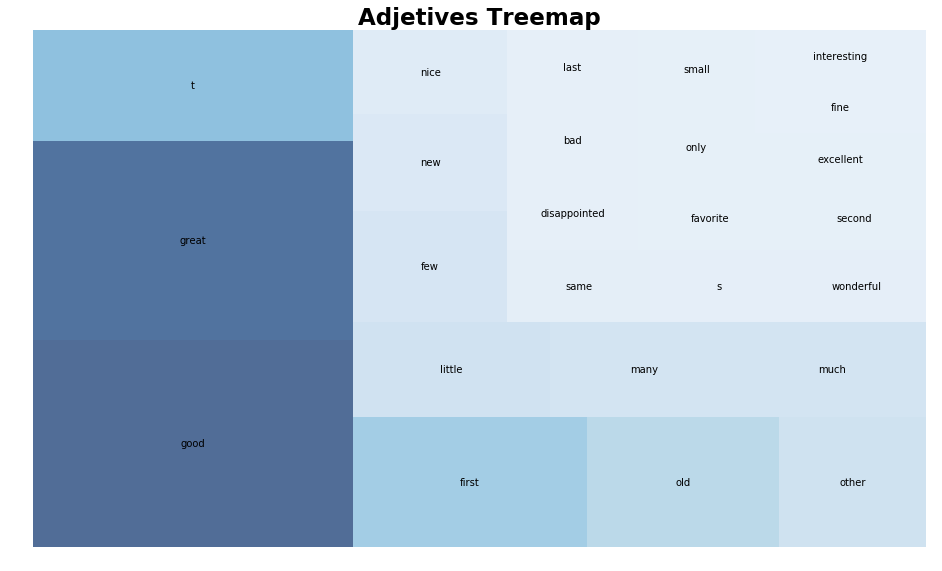

In [60]:
cmap1 = matplotlib.cm.Blues

mini=min(values)
maxi=max(values)

norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap1(norm(value)) for value in values]
 
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9.5)

squarify.plot(sizes=values[:25], label=labels[:25], color = colors,alpha = .7) #transparencia
plt.title("Adjetives Treemap",fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()

# Conclusión y trabajo futuro

Metric | Score 
-- | -- 
Accuracy | 57%
Precision | 47.6%
Recall | 75.9%

- Mejorar el modelo podría traer mejores resultados, yo creo que SI, pero sería una tarea más detallada y exhaustiva.
- Una mejor dorma de evaluer el modelo
- Lo ideal sería tener un score de precision bueno, ya que nos importa no etiquetar como positiva una muestra que es negativa.
- Otras visualizaciones